# To be completed at the Live Session and in your own time.

These set of examples we will help you get familiar with non parametric tests and correlations within a Jupyter notebook.   The questions coloured green are important practice for CA, particularly Question 5.

Before attempting these examples, please ensure you have read through [Chapter 5 Jupyter Notebook](https://github.com/haleygomez/Data-Analysis-2022/blob/master/blended_exercises/Chapter5/Chapter5.ipynb) and have completed the Learning Central **Chapter 5 quiz**. 

***

In [10]:
import numpy as np
from matplotlib import pyplot as plt

from scipy import stats

#  Hypothesis Testing

## <font color=#30a64d>Question</font>

In the previous week, we used the datafile [worldpopulation.txt](https://github.com/haleygomez/Data-Analysis-2021/raw/master/blended_exercises/Chapter4/worldpopulation.txt) to estimate the correlation between the world population size measured over time. 

1. Measure the correlation coefficient using the in built Python package for the Spearman $\rho$ statistic. 

2. Measure it again but this time creating the functions to calculate $\rho$ from scratch.   You can use the in-built function to rank datasets from scipy.stats: `from scipy.stats import rankdata`.

### Answer

*Your answer here.*

In [1]:
!wget https://raw.githubusercontent.com/haleygomez/Data-Analysis-2021/master/blended_exercises/Chapter4/worldpopulation.txt

--2022-10-31 11:14:30--  https://raw.githubusercontent.com/haleygomez/Data-Analysis-2021/master/blended_exercises/Chapter4/worldpopulation.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2950 (2.9K) [text/plain]
Saving to: ‘worldpopulation.txt’

worldpopulation.txt 100%[===================>]   2.88K  --.-KB/s    in 0s      

2022-10-31 11:14:30 (33.3 MB/s) - ‘worldpopulation.txt’ saved [2950/2950]



***

Pearson r correlation is 1.000
Spearman rho correlation is 1.000


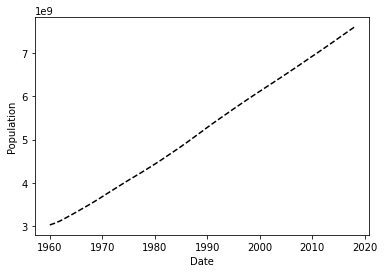

In [7]:
population = np.loadtxt("/content/worldpopulation.txt")

plt.plot(*population, "k--") #the * operator splits px in x[0], x[1]
plt.xlabel("Date")
plt.ylabel("Population")

corr_pearson, p_pearson = stats.pearsonr(*population)
print('Pearson r correlation is {:.3f}'.format(corr_pearson))

corr_spearman, p_spearman = stats.spearmanr(*population)
print('Spearman rho correlation is {:.3f}'.format(corr_spearman))

In [40]:
def spearman_diy(x,y):
  rank_x = stats.rankdata(x)
  rank_y = stats.rankdata(y)

  N = len(x)

  num = np.sum( (rank_x * rank_y) ) - ((N * (N+1)**2)/4)

  denom_x = ( np.sum(rank_x**2 )- (N * (N+1)**2)/4)
  denom_y = ( np.sum(rank_y**2 )- (N * (N+1)**2)/4)
  denom = denom_x**(1/2)*denom_y**(1/2)

  return num / denom

In [41]:
corr_spearman = spearman_diy(*population)
print('Spearman rho correlation is {:.3f}'.format(corr_spearman))

Spearman rho correlation is 1.000


# KS Test

## Question

Two near-by apple trees are in bloom in an otherwise empty field. One is a Whitney Crab the other is a Redwell. We want to test if bees prefer one tree to the other.

To do this we collect data. We use a stop watch to time how long a bee stays near a particular tree. We begin to time when the bee touches the tree, we stop timing when the bee is more than a metre from the tree. Unfortunately we did not get exactly the same number of bees for each tree as it started to rain.   The data is below (time is in seconds). Can we conclude anything based on our experiment?

In [19]:
redwell= np.array([23.4, 30.9, 18.8, 23.0, 21.4, 1, 24.6, 23.8, 24.1, 18.7, 16.3, 20.3, 14.9, 35.4, 21.6, 21.2, 21.0, 15.0, 15.6, 24.0, 34.6, 40.9, 30.7, 24.5, 16.6, 1, 21.7, 1, 23.6, 1, 25.7, 19.3, 46.9, 23.3, 21.8, 33.3, 24.9, 24.4, 1, 19.8, 17.2, 21.5, 25.5, 23.3, 18.6, 22.0, 29.8, 33.3, 1, 21.3, 18.6, 26.8, 19.4, 21.1, 21.2, 20.5, 19.8, 26.3, 39.3, 21.4, 22.6, 1, 35.3, 7.0, 19.3, 21.3, 10.1, 20.2, 1, 36.2, 16.7, 21.1, 39.1, 19.9, 32.1, 23.1, 21.8, 30.4, 19.62, 15.5])

whitney=np.array([16.5, 1, 22.6, 25.3, 23.7, 1, 23.3, 23.9, 16.2, 23.0, 21.6, 10.8, 12.2, 23.6, 10.1, 24.4, 16.4, 11.7, 17.7, 34.3, 24.3, 18.7, 27.5, 25.8, 22.5, 14.2, 21.7, 1, 31.2, 13.8, 29.7, 23.1, 26.1, 25.1, 23.4, 21.7, 24.4, 13.2, 22.1, 26.7, 22.7, 1, 18.2, 28.7, 29.1, 27.4, 22.3, 13.2, 22.5, 25.0, 1, 6.6, 23.7, 23.5, 17.3, 24.6, 27.8, 29.7, 25.3, 19.9, 18.2, 26.2, 20.4, 23.3, 26.7, 26.0, 1, 25.1, 33.1, 35.0, 25.3, 23.6, 23.2, 20.2, 24.7, 22.6, 39.1, 26.5, 22.7])

### Answer

*Your answer here.*

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


{'whiskers': [<matplotlib.lines.Line2D at 0x7fb676844950>,
 'caps': [<matplotlib.lines.Line2D at 0x7fb67682e490>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fb67686ad50>,
 'medians': [<matplotlib.lines.Line2D at 0x7fb67682ef10>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fb67683f4d0>,
 'means': []}

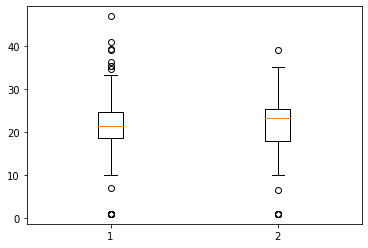

In [23]:
plt.boxplot([redwell,whitney])


***

# Chi-square test

## Question 

You publish flyers for an event in three different colours and want to test whether the colour has a significant affect on whether people take them. The data is available below.  Use the $\chi^2$ test to do this, and calculate the probability of the significance of the result.

| |white | light blue | neon pink | Totals|
|---|---|---|---|---|
|Take | 32| 38 | 20| 90| 
|Don't take | 8| 22 |30 | 60| 
|Totals | 40|60 | 50| 150| 

### Answer

*Your answer here.*

***